# **Analisis Prediksi Harga Rumah Sesuai Spesifikasi Di Jakarta Selatan Menggunakan Algoritma Multiple Linear Regression**

# **Process Stages**

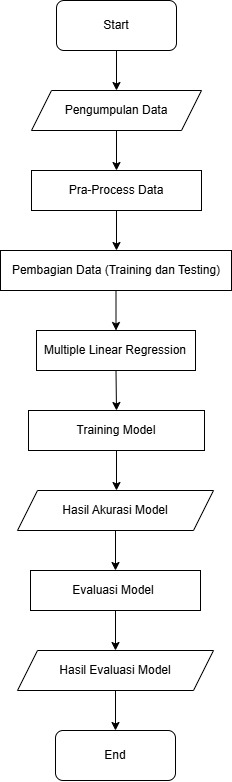

# **Data Loading & Initial Exploration**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Baca file CSV
df = pd.read_csv('Prediksi_Harga_Rumah.csv', encoding='latin-1')

In [3]:
# Lihat beberapa data awal
df.head(10)

,NAMA RUMAH,HARGA,LUAS_BANGUNAN,LUAS_TANAH,KAMAR_TIDUR,KAMAR_MANDI,GARASI
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
5,Rumah Mewah Modern Murah 3 lantai di Tebet Jak...,4970000000,300,154,5,3,3
6,"Rumah lama di Tebet, dekat MT Haryono dan tol ...",2600000000,120,150,3,2,1
7,RUMAH BAGUS KEREN JALAN LEBAR DI AREA & KAWASA...,10500000000,350,247,4,4,0
8,Minimalis Baru Jalan 1 Mobil Akses Mudah Dekat...,3250000000,125,90,3,3,0
9,"Minimalis Baru Jalan 2 Mobil Tebet Timur, Tebe...",4500000000,250,96,5,4,1


# **Data Understanding & Preprocessing**

In [4]:
df.shape

(1010, 7)

In [5]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,HARGA,LUAS_BANGUNAN,LUAS_TANAH,KAMAR_TIDUR,KAMAR_MANDI,GARASI
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [6]:
#Mencari dan menangani missing values
df.isnull().sum()

,0
NAMA RUMAH,0
HARGA,0
LUAS_BANGUNAN,0
LUAS_TANAH,0
KAMAR_TIDUR,0
KAMAR_MANDI,0
GARASI,0


In [7]:
# # Menghapus satu kolom
df = df.drop(columns=["NAMA RUMAH"])

# **Exploratory Data Analysis (EDA) - Univariate Analysis**

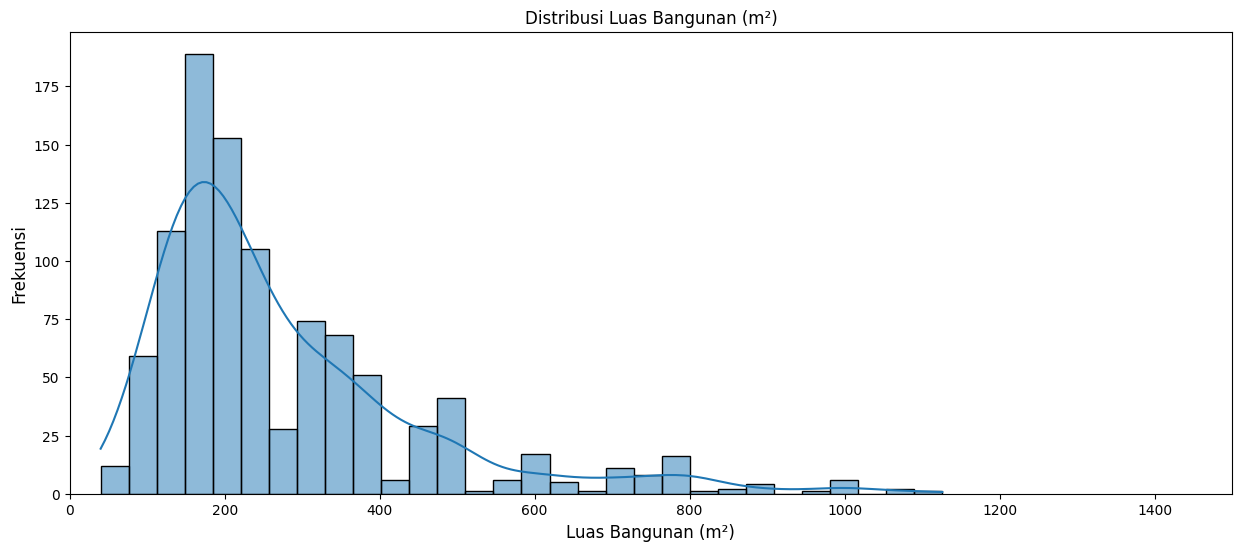

In [8]:
f = plt.figure(figsize=(15,6)) # Perbesar ukuran gambar

# Filter data di bawah 2500
df_filtered = df[df['LUAS_BANGUNAN'] <= 2500]

sns.histplot(data=df_filtered, x='LUAS_BANGUNAN', kde=True, bins=30)
plt.title('Distribusi Luas Bangunan (m²)', )
plt.xlabel('Luas Bangunan (m²)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Batasi range sumbu x dari 0 sampai 2000
plt.xlim(0, 1500)
plt.show()


Text(0, 0.5, 'Frekuensi')

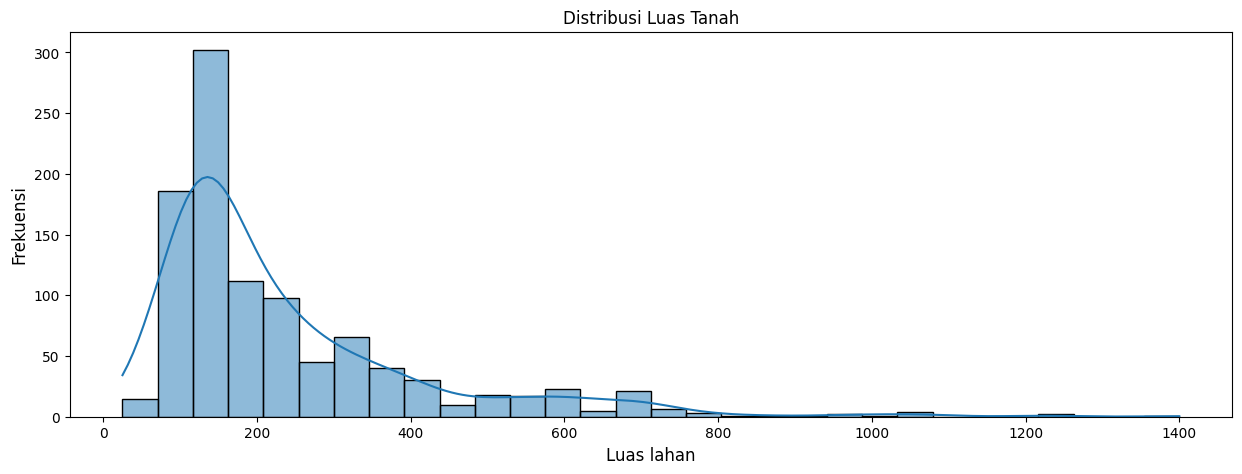

In [9]:
f = plt.figure(figsize=(15,5)) # Perbesar ukuran gambar

# Filter data di bawah 2500
df_filtered = df[df['LUAS_TANAH'] <= 2500]


sns.histplot(data=df_filtered, x='LUAS_TANAH', kde=True, bins=30)
plt.title('Distribusi Luas Tanah', )
plt.xlabel('Luas lahan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

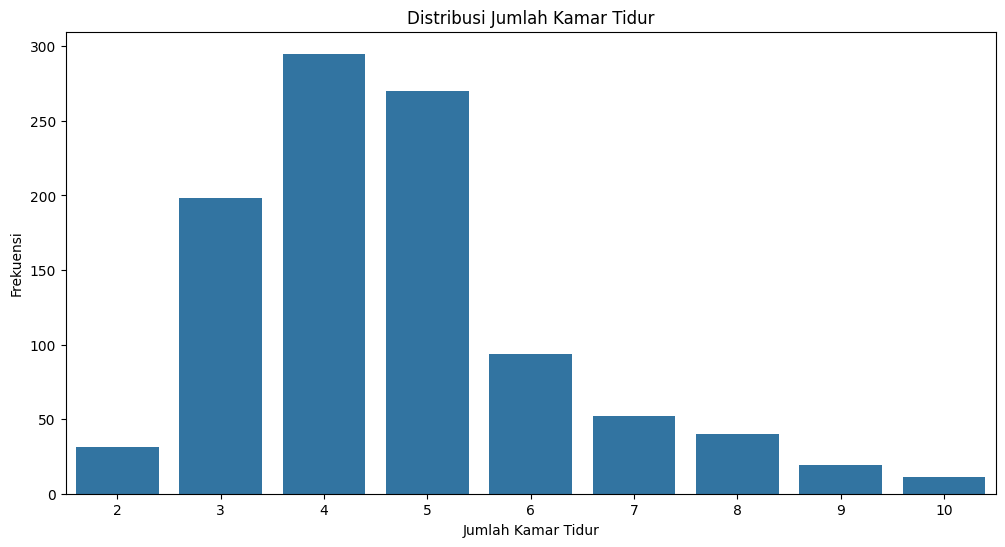

In [10]:
plt.figure(figsize=(12, 6))  # Perbesar ukuran gambar

# Buat count plot
sns.countplot(data=df, x='KAMAR_TIDUR')

# Tambahkan judul dan label
plt.title('Distribusi Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Frekuensi')
plt.show()

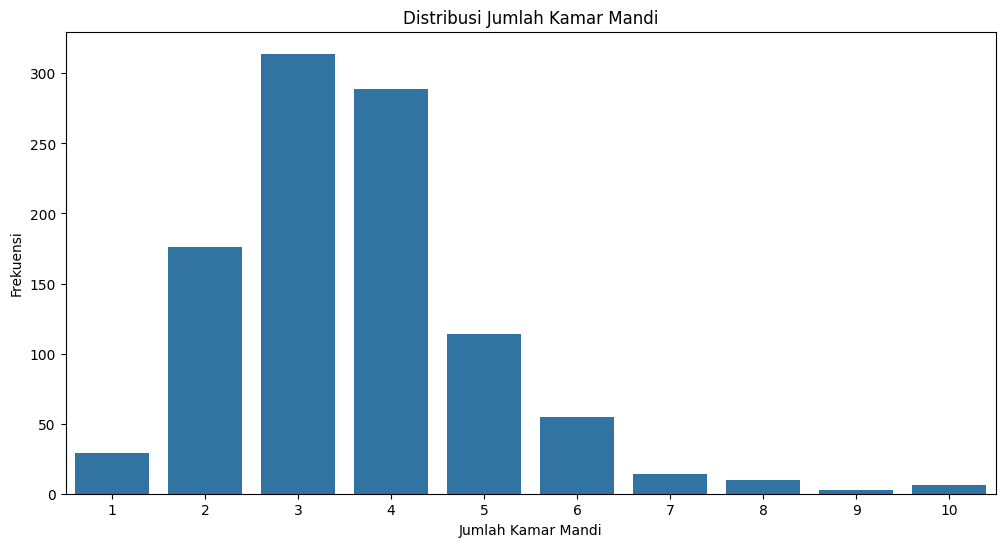

In [11]:
plt.figure(figsize=(12, 6))  # Perbesar ukuran gambar

# Buat count plot
sns.countplot(data=df, x='KAMAR_MANDI')

# Tambahkan judul dan label
plt.title('Distribusi Jumlah Kamar Mandi')
plt.xlabel('Jumlah Kamar Mandi')
plt.ylabel('Frekuensi')
plt.show()

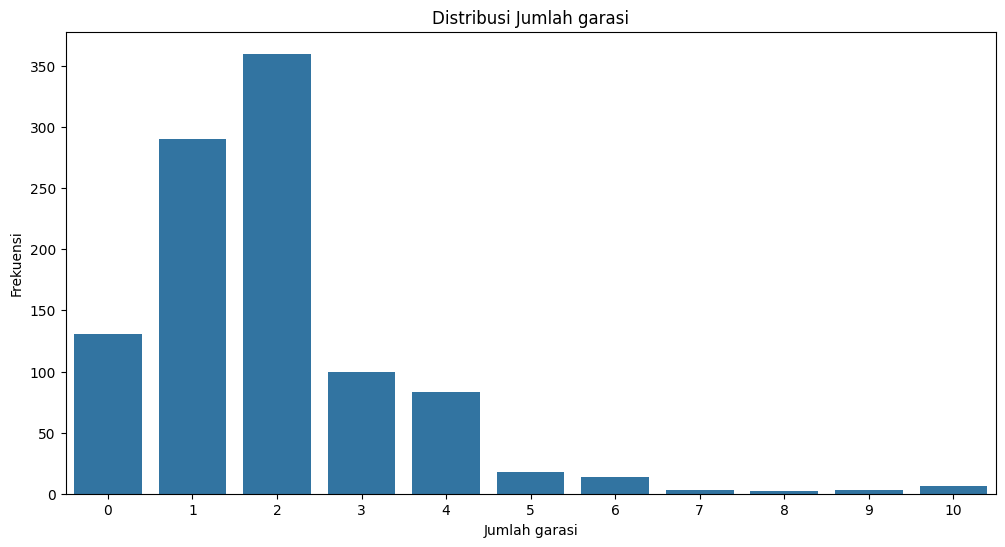

In [12]:
plt.figure(figsize=(12, 6))  # Perbesar ukuran gambar

# Buat count plot
sns.countplot(data=df, x='GARASI')

# Tambahkan judul dan label
plt.title('Distribusi Jumlah garasi')
plt.xlabel('Jumlah garasi')
plt.ylabel('Frekuensi')

plt.show()

# **Exploratory Data Analysis (EDA) - Bivariate Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

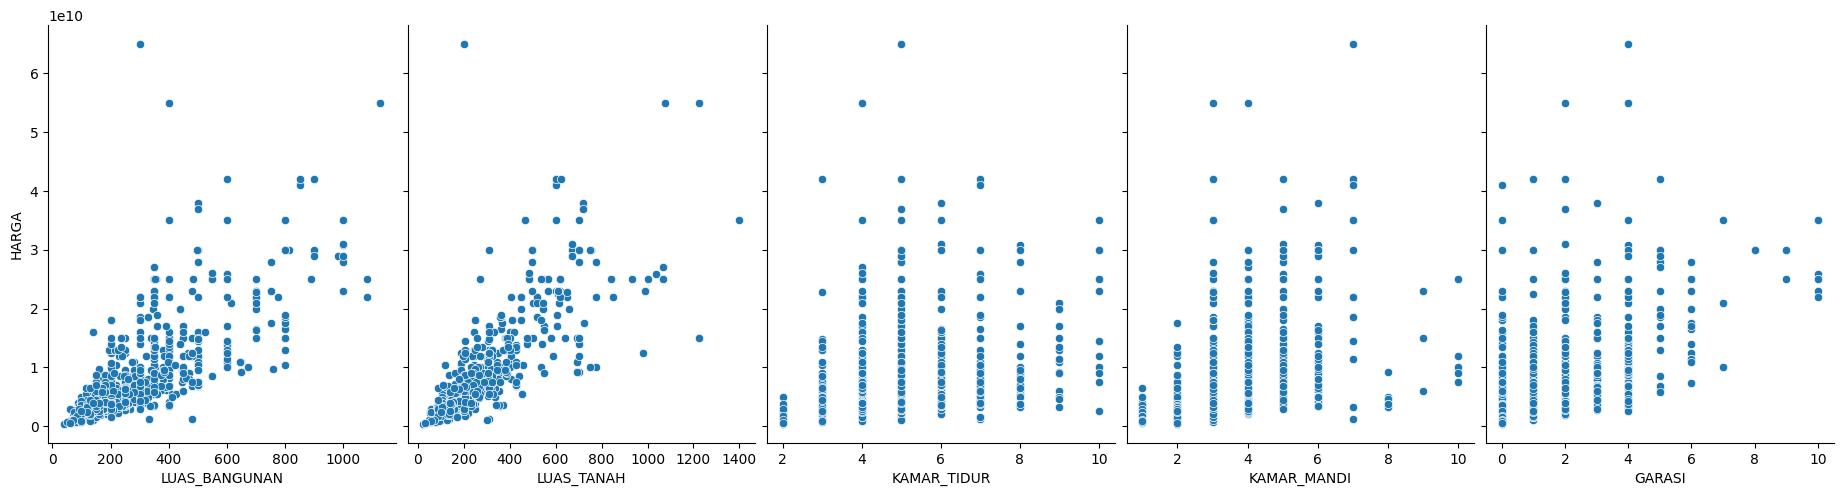

In [13]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['LUAS_BANGUNAN', 'LUAS_TANAH', 'KAMAR_TIDUR', 'KAMAR_MANDI', 'GARASI'], y_vars=['HARGA'], size=5, aspect=0.75)
plt.show()

# **Model Development**

In [15]:
#Recall data kita
df.head()

,HARGA,LUAS_BANGUNAN,LUAS_TANAH,KAMAR_TIDUR,KAMAR_MANDI,GARASI
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [16]:
#Pertama, buat variabel x dan y
x = df.drop(columns='HARGA')
y = df['HARGA']

In [17]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
#Ketiga, kita bikin object linear regresi
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
print("Koefisien (b1-b5):", model.coef_.tolist())
print("Intercept:", model.intercept_)

y_pred = model.predict(x_test)

Koefisien (b1-b5): [12285254.070368147, 23268141.95185788, -638754626.4738376, 556618859.4511911, 247983447.7381633]
Intercept: -775923911.9377832


In [20]:
print("Akurasi : ", model.score(x_test, y_test))

Akurasi :  0.7713134894077545


# **Model Prediction**

In [21]:
# Contoh data baru (misalnya: 'LUAS_BANGUNAN', 'LUAS_TANAH', 'KAMAR_TIDUR', 'KAMAR_MANDI', 'GARASI')
data_baru = np.array([[250, 250, 7, 7, 4]])

# Membulatkan dan memformat sebagai mata uang
prediksi_harga = model.predict(data_baru)
prediksi_harga_rounded = round(prediksi_harga[0])
harga_formatted = f'Rp {prediksi_harga_rounded:,.0f}'

print(f'Harga rumah untuk data yang anda berikan adalah : {harga_formatted}')

Harga rumah untuk data yang anda berikan adalah : Rp 8,529,408,515


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Kesimpulan :**

Berdasarkan hasil implementasi model machine learning untuk
memprediksi harga rumah di Jakarta Selatan, dapat disimpulkan bahwa
sistem prediksi berbasis multiple regresi linier dapat diimplementasikan
secara cukup efektif sebagai alat bantu bagi pemangku kepentingan.
Model yang dikembangkan menunjukkan tingkat akurasi sebesar 77%,
yang mengindikasikan bahwa model tersebut mampu menjelaskan
sebagian besar variasi harga properti berdasarkan variabel-variabel yang
digunakan. Tingkat akurasi ini dapat dianggap memadai mengingat
kompleksitas pasar properti dan banyaknya faktor yang dapat
mempengaruhi harga.

Model regresi linier yang dikembangkan berhasil mengidentifikasi
dan mengukur pengaruh berbagai variabel terhadap harga properti,
seperti luas tanah, luas bangunan, dan variabel relevan lainnya. Dengan
tingkat akurasi 77%, model ini dapat memberikan estimasi yang cukup
reliable untuk mayoritas kasus, meskipun tetap disarankan untuk
mengombinasikannya dengan penilaian ahli dan pertimbangan faktor-faktor lain yang mungkin tidak tercakup dalam model. Efektivitas
algoritma regresi linier dalam menggunakan data historis dan faktor-faktor spesifik properti terbukti mampu menghasilkan prediksi dengan
tingkat kesalahan yang dapat diterima.